# Deep Learning

<font color="blue"> Mahalavanya Sriram </font>

# I. Overview

The goal of this workbook is to build the classification data into a deep neural network. Deep neural networks with multiple combinations of hidden layers and hidden units will be discussed. The basic intuition behind this workbook is that we will strive to learn and investigate how the number of variables in the deep neural network influence the accuracy of our model. We will be using the TensorFlow library for deep networks for this workbook. 

1. Number of Layers.
2. Number of hidden units.
3. Find a right balance between bias-variance.
4. Preventing the problem of vanishing gradient.
5. Activation Functions.
6. Optimizer.
7. Dropouts.
8. Hyperparameters tuning.


# II. Data
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.hese areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

You must predict the Cover_Type for every row in the test set (565892 observations).

## Data Attributes
The dataset has 54 features and 1 target variable 'Cover_Type'. From 54 features, 10 are numeric and 44 are catrgorical. From 44 categorical, 40 are of Soil_Type and 4 of Wilderness_Area.

1. Elevation - Elevation in meters
2. Aspect - Aspect in degrees azimuth
3. Slope - Slope in degrees
4. Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
5. Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
6. Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
7. Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
8. Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
9. Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
10. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
11. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
12. Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
13. Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

### Data Source

https://www.kaggle.com/c/forest-cover-type-prediction/overview

#### Reading the data

In [1]:
!pip install tensorflow
!pip install keras

In [2]:
#loading the required packages
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, f1_score

In [3]:
# Importing all the datasets required
forest_covtype_data = pd.read_csv("data/covtype.csv")

#### Data description

In [4]:
# Checking for the number of rows and columns in a dataset.
forest_covtype_data.shape

(581012, 55)

In [5]:
#Checking the attributes in the dataset
forest_covtype_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
# display all the columns
pd.options.display.max_columns = None
# the top 5 rows of the dataset
forest_covtype_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
# checking the statistical summary of the dataset 
forest_covtype_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#### Data Cleaning and Pre-processing
##### looking for missing values in the dataset

In [8]:
#Check for nulls in the dataset and count for the number of nulls
forest_covtype_data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


No Missing values are found in the dataset

##### Down Sampling Data

In [9]:
forest_covtype_data = forest_covtype_data.sample(n= 25000)

The above code is just taking random 20000 sample from the dataset because our initial dataset has very large number of samples (more than half a million). So we just sample out the data in order to reduce the computation time.



In [10]:
# Resetting the index for our sampled dataset
forest_covtype_data = forest_covtype_data.reset_index(drop=True)

In [11]:
forest_covtype_data.shape

(25000, 55)

##### Skewness

If the skewness is equal to zero,data is perfectly symmetrical. If skewness is positive, the data are positively skewed or skewed right. If skewness is negative, the data are negatively skewed or skewed left.

In [12]:
# analysing the skewness 
forest_covtype_data.skew()

Elevation                              -0.802712
Aspect                                  0.406172
Slope                                   0.798280
Horizontal_Distance_To_Hydrology        1.157640
Vertical_Distance_To_Hydrology          1.808540
Horizontal_Distance_To_Roadways         0.731237
Hillshade_9am                          -1.161866
Hillshade_Noon                         -1.047467
Hillshade_3pm                          -0.291980
Horizontal_Distance_To_Fire_Points      1.301016
Wilderness_Area1                        0.203619
Wilderness_Area2                        4.135537
Wilderness_Area3                        0.261092
Wilderness_Area4                        3.513316
Soil_Type1                             14.773952
Soil_Type2                              8.140926
Soil_Type3                             10.644310
Soil_Type4                              6.778647
Soil_Type5                             17.936472
Soil_Type6                              9.273061
Soil_Type7          

We can see that many are positively skewed and Soil_Type 8 and Soil_Type 25 are highly positively skewed.
Hillshade data are negatively skewed.

##### Target Data Distribution

In [13]:
print(forest_covtype_data['Cover_Type'].value_counts())

2    12155
1     9060
3     1566
7      895
6      775
5      428
4      121
Name: Cover_Type, dtype: int64


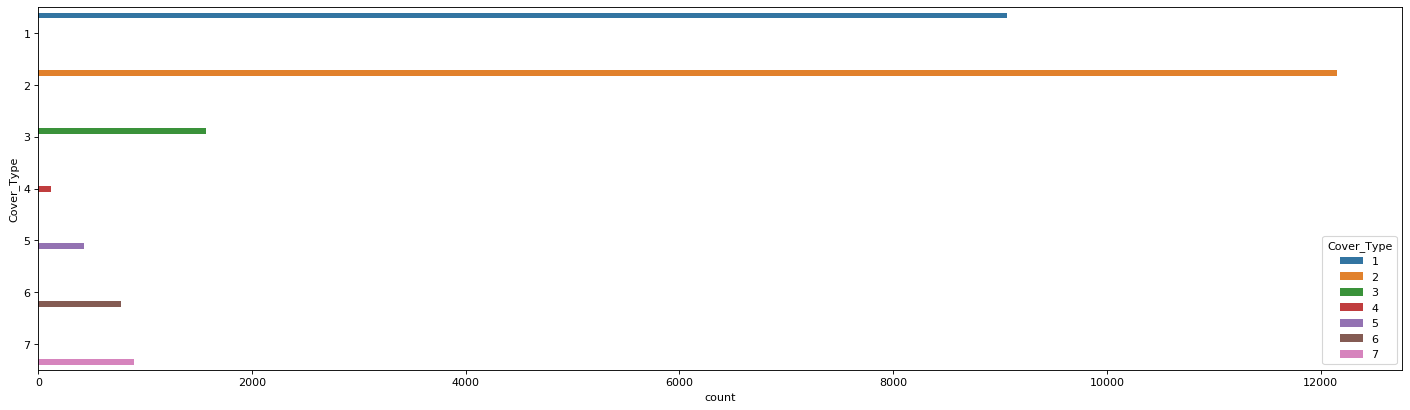

In [14]:
plt.figure(figsize=(22,6), dpi= 80)
ax = sns.countplot(y=forest_covtype_data["Cover_Type"], hue="Cover_Type", data=forest_covtype_data)

The target data is not equally distributed across the cover types

##### Correlation

In [15]:
corr = forest_covtype_data.corr()

In [16]:
corr['Cover_Type'].sort_values(ascending = False)

Cover_Type                            1.000000
Wilderness_Area4                      0.325780
Soil_Type10                           0.243077
Soil_Type38                           0.171645
Slope                                 0.150783
Soil_Type39                           0.149374
Soil_Type40                           0.143812
Soil_Type6                            0.121431
Soil_Type2                            0.114651
Soil_Type17                           0.096515
Soil_Type4                            0.092720
Vertical_Distance_To_Hydrology        0.091216
Soil_Type5                            0.088656
Soil_Type1                            0.083684
Soil_Type37                           0.082918
Soil_Type3                            0.073842
Soil_Type35                           0.067573
Soil_Type14                           0.065021
Wilderness_Area3                      0.063471
Soil_Type11                           0.039413
Soil_Type13                           0.025666
Soil_Type36  

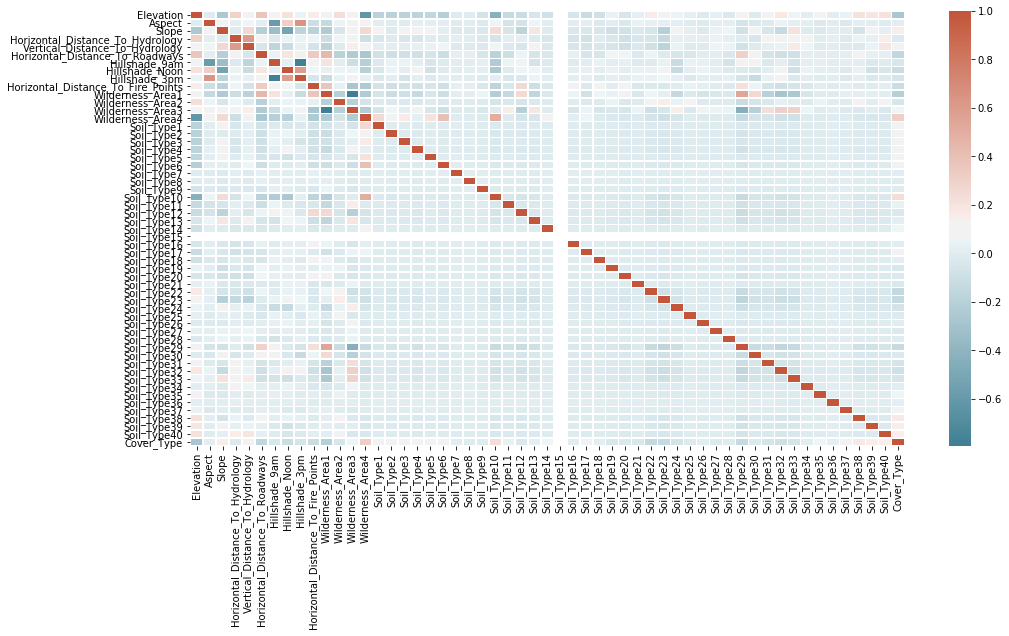

In [17]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)  
plt.figure(figsize = (16,8)) 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, linewidths=.5)

Analysing the above heatmap the following relations were highly corellated
- Elevation and Horizontal Distance to Roadways.
- Aspect and Hillshade at 9am
- Aspect and Hillshade at 3pm
- Slope and Hillshade at Noon
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Hillshade at 9am and Hillshade at 3pm
- Hillshade at 3pm and Hillshade at Noon

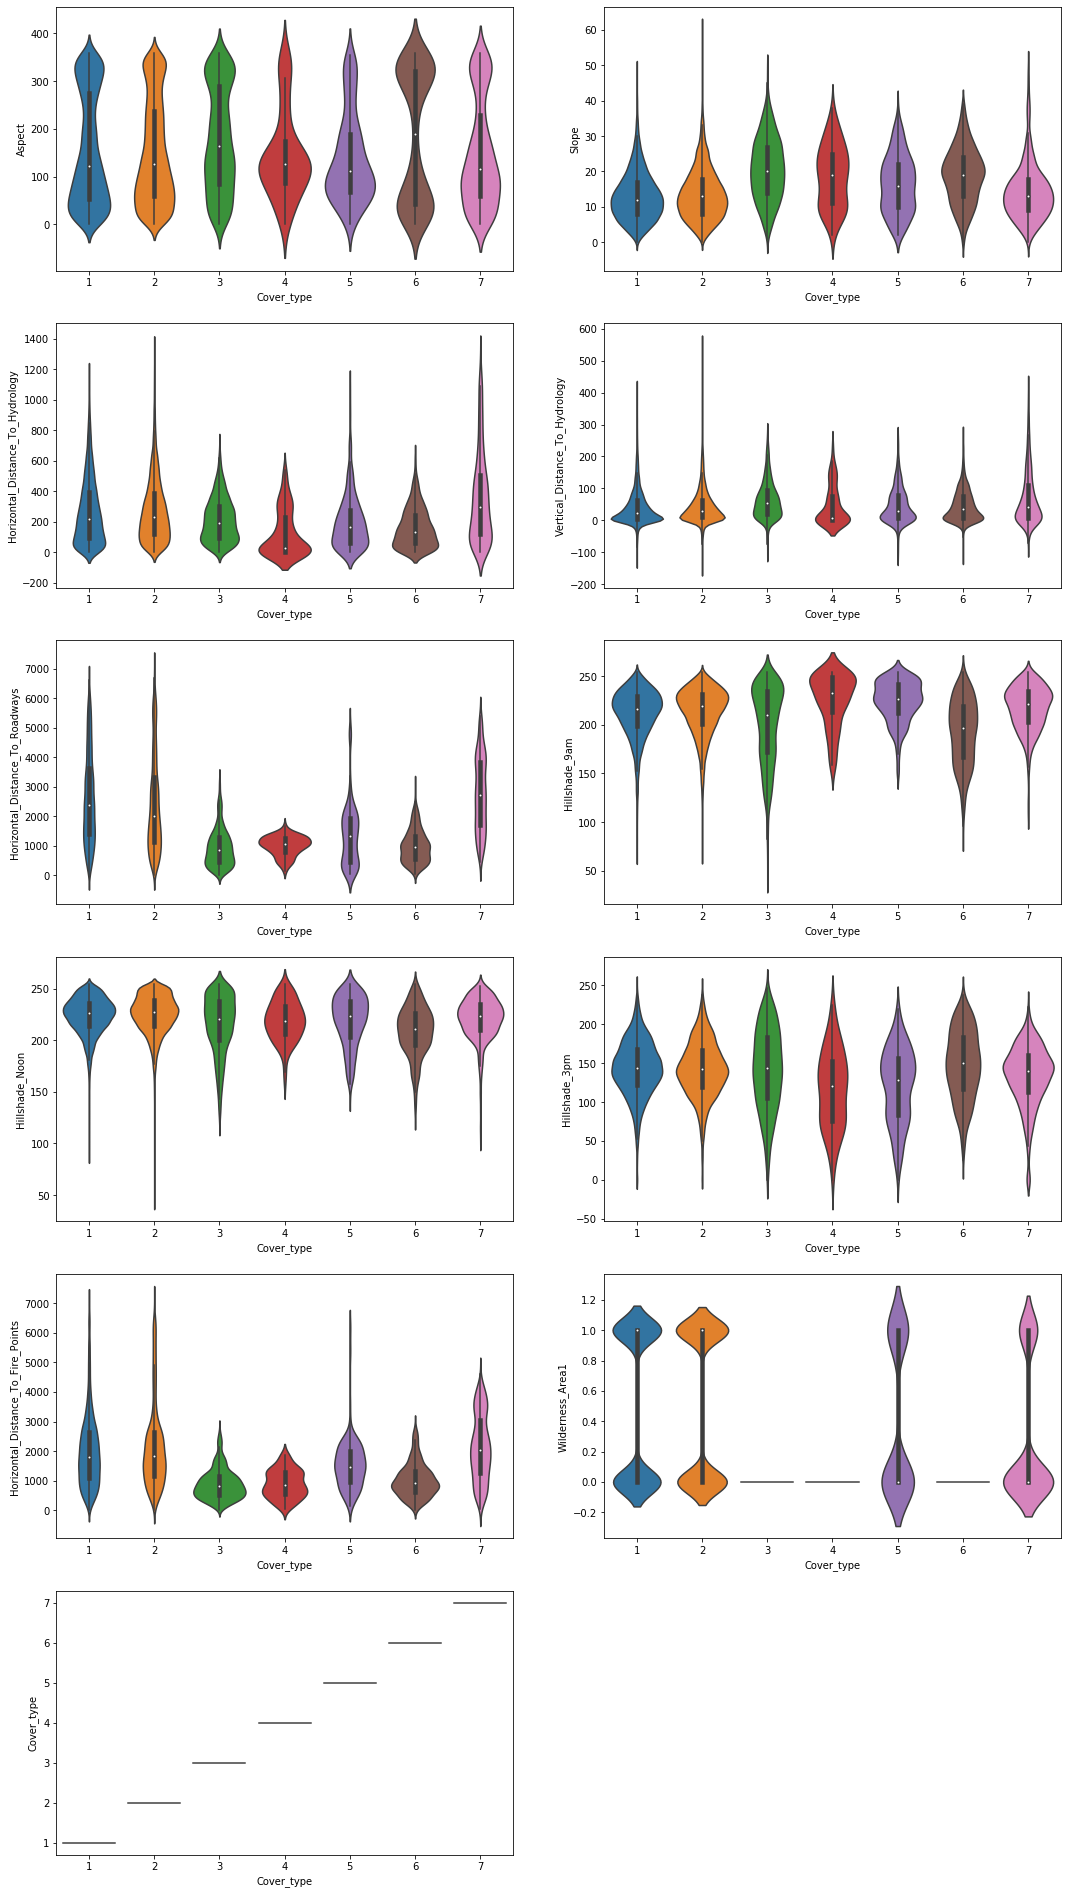

In [18]:
forest_covtype_data_cont = forest_covtype_data.iloc[:,1:11].copy()
 
forest_covtype_data_cont['Cover_type'] = forest_covtype_data.Cover_Type 
fig = plt.figure()
fig.set_figheight(34)
fig.set_figwidth(18)

for i, item in enumerate(forest_covtype_data_cont.columns.to_list()):
    fig.add_subplot(math.ceil(len(forest_covtype_data_cont.columns.to_list())/2), 2, i+1)
    sns.violinplot(y= item, x = 'Cover_type', data = forest_covtype_data_cont)

# plt.savefig('Graph/Bivariate_feat_cover.jpg')
plt.show()

[Text(0, 0, 'Rawah Wilderness Area'),
 Text(0, 0, 'Neota Wilderness Area'),
 Text(0, 0, 'Comanche Peak Wilderness Area'),
 Text(0, 0, 'Cache la Poudre Wilderness Area')]

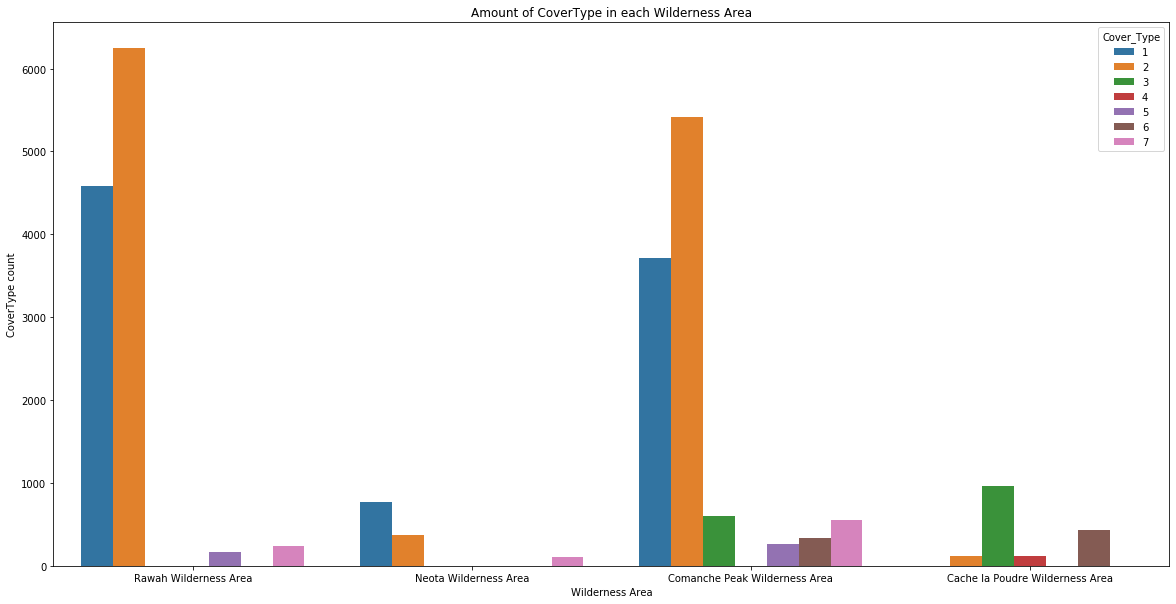

In [19]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
dataTransformed = pd.melt(forest_covtype_data[["Cover_Type",'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']], id_vars=['Cover_Type'], value_vars=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
dataAggregated = pd.DataFrame(dataTransformed.groupby(["Cover_Type","variable"],sort=True)["value"].sum()).reset_index()
sns.barplot(x=dataAggregated["variable"], y=dataAggregated["value"],hue=dataAggregated["Cover_Type"], data = dataAggregated)
ax.set(xlabel='Wilderness Area', ylabel='CoverType count',title = 'Amount of CoverType in each Wilderness Area', label='big')
ax.set_xticklabels(["Rawah Wilderness Area","Neota Wilderness Area","Comanche Peak Wilderness Area","Cache la Poudre Wilderness Area"])


Wilderness Area Rawah and "Comanche Peak seem to be good discrminators of the cover types (distinct classes).


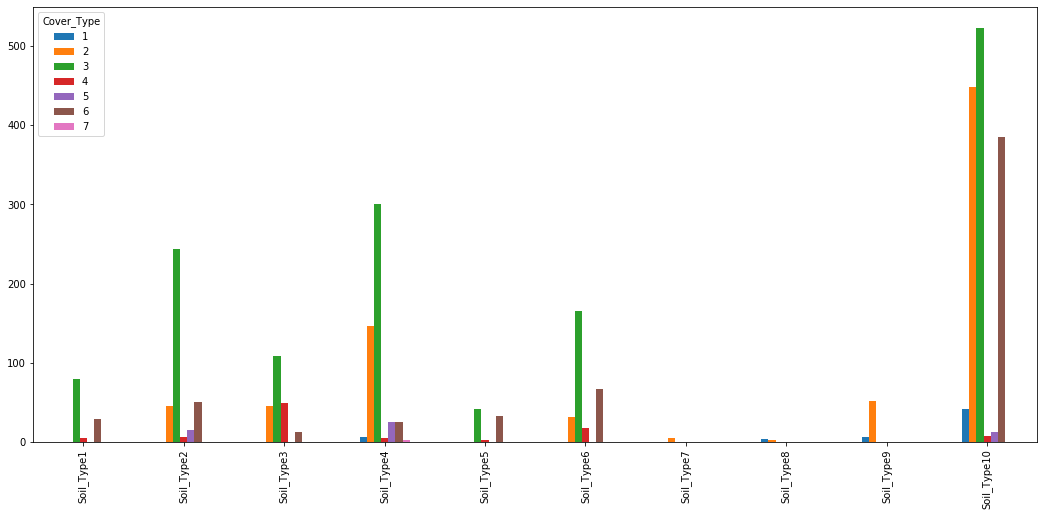

In [20]:
soil_columns = forest_covtype_data.columns[forest_covtype_data.columns.str.contains('Soil')].to_list()
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[:10]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

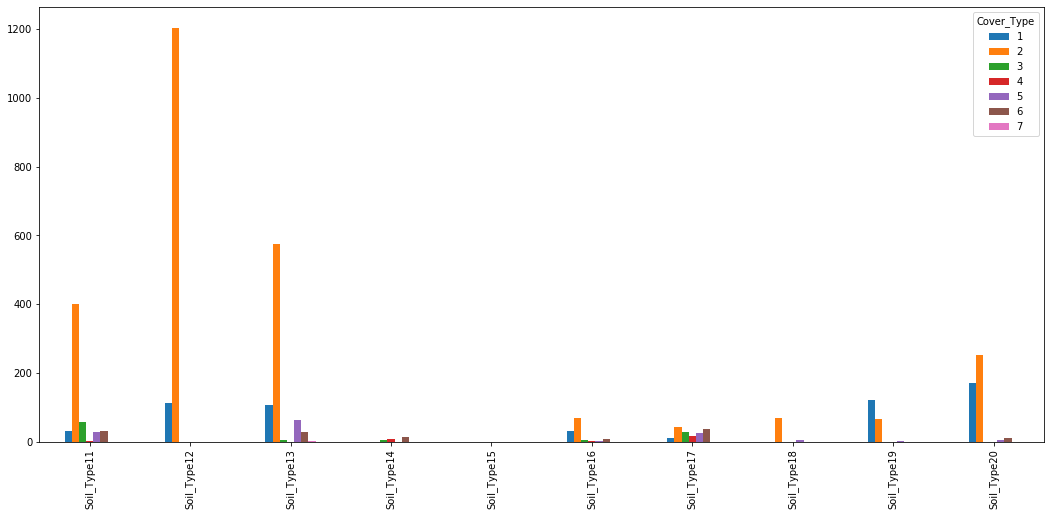

In [21]:
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[10:20]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

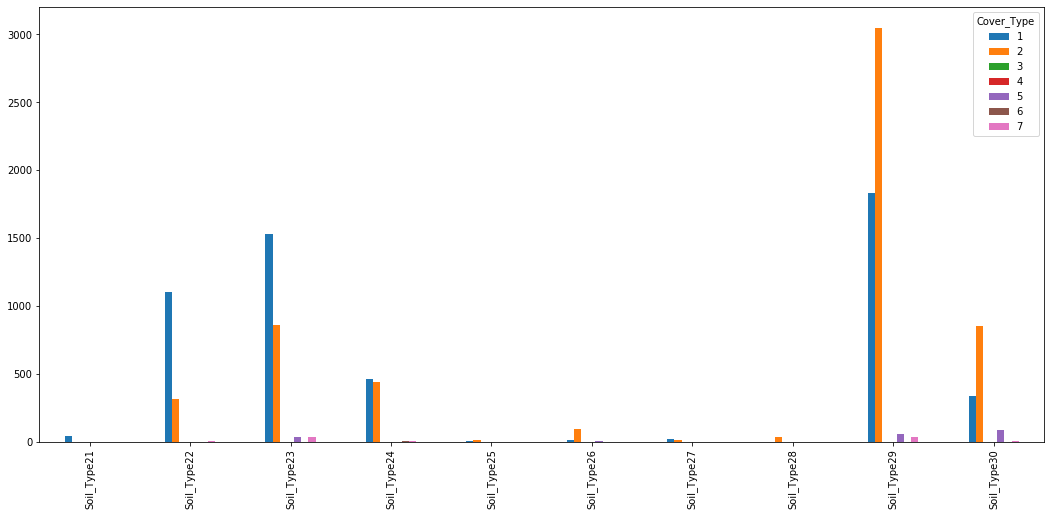

In [22]:
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[20:30]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

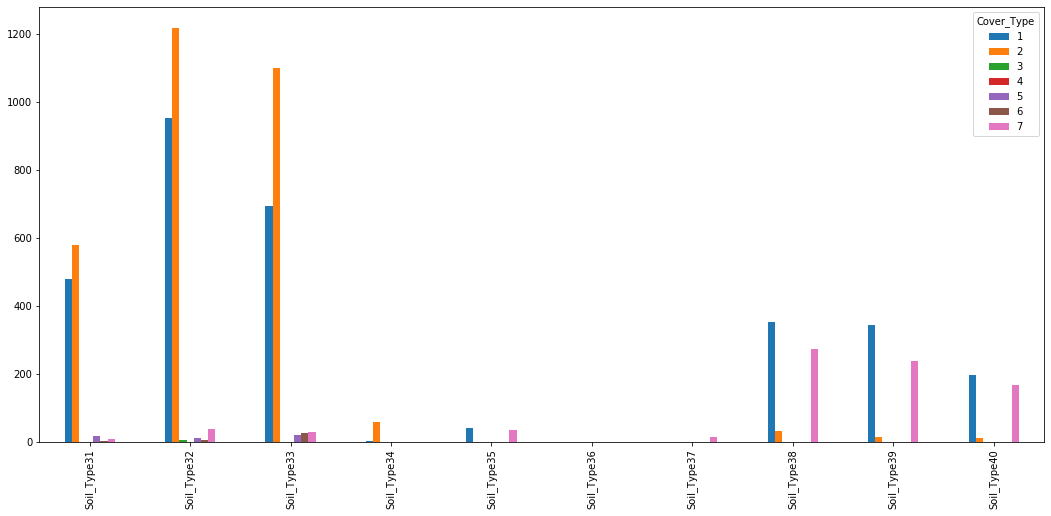

In [23]:
data_soil = forest_covtype_data.groupby(['Cover_Type'])[soil_columns[30:]].sum()
data_soil.T.plot(kind = 'bar', figsize = (18,8))
plt.show()

### Observation

The Dataset had no missing values. And no issues from the part of categorical attributes because the datatset we got was already Encoded. And Normalization of the data will be handled during the implementation of each algorithm and that can be done in data preprocessing part also, so no difference in that.

From the data visualizations we were able to conclude the following
- The target data is equally distributed across the cover types
- Elevation plays an important role in forest cover type distribution.krummholz,Spruce and Lodgepole trees grow on higher elevation and douglas,Ponderosa and Cottonwood at lower elevation.
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers.But Neota Wild Area has least number of forests compared to other wild areas.We can also see that none of the wild areas have all the types of forest covers.
- We have most of the data for soil type 10 and 29. Many soil types are rare in our data
- We can see that Krummholz and Spruce,Fir trees are located at higher elevation in all the four wild areas compared to other trees.
- Many of the Logdepole,Krummholz are located closer to surface waters

### Data Preprocessing

#### Changing the Multi class to Binary class

In [24]:
change = {1:0, 2:1, 3:0, 4:0, 5:0, 6:0, 7:0}
forest_covtype_data_binary = forest_covtype_data.copy()
forest_covtype_data_binary['Cover_Type'] = forest_covtype_data_binary['Cover_Type'].replace(change)

In [25]:
print(forest_covtype_data_binary['Cover_Type'].value_counts())
print(forest_covtype_data_binary.shape)

0    12845
1    12155
Name: Cover_Type, dtype: int64
(25000, 55)


We are going to drop the features which have low standard deviation or co-relation.

In [26]:
forest_covtype_data_binary = forest_covtype_data_binary.loc[:,['Horizontal_Distance_To_Roadways', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29','Horizontal_Distance_To_Fire_Points', 'Slope', 'Wilderness_Area4', 'Soil_Type39', 'Soil_Type38', 'Soil_Type2', 'Soil_Type40', 'Soil_Type4', 'Cover_Type']]

# III. Methods

In [27]:
from sklearn.model_selection import train_test_split
def split(X, T):
    return train_test_split(X, T, test_size = .2) 

In [28]:
X_train, X_test, T_train, T_test = split(forest_covtype_data_binary.iloc[:,:-1], forest_covtype_data_binary.iloc[:,-1:])

print("Shape of X_train{}, X_test{}, T_train{}, T_test{}"
      .format(X_train.shape, X_test.shape, T_train.shape, T_test.shape))

Shape of X_train(20000, 12), X_test(5000, 12), T_train(20000, 1), T_test(5000, 1)


In [29]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
T_train = T_train.reset_index(drop=True)
T_test = T_test.reset_index(drop=True)

In [30]:
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
training_labels = onehot_encoder.fit_transform(T_train)
test_labels = onehot_encoder.fit_transform(T_test)
print("Shape of T_train{}, T_test{}".format(training_labels.shape, test_labels.shape))

Shape of T_train(20000, 2), T_test(5000, 2)


In [31]:
X_train_np = X_train.values
X_test_np = X_test.values
T_train_np = T_train.values
T_test_np = T_test.values

X_train.shape, X_test.shape, T_train.shape, T_test.shape

((20000, 12), (5000, 12), (20000, 1), (5000, 1))

In [32]:
# Normalization:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

In [33]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

In [34]:
#Necessary Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, Adam, SGD, Adadelta
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

##  3 diferent neural network

In this section, I will be discussing about 3 different choices of neural network based on number of hidden units, hidden layers, optimizers and other hyperparameter tunings.

### Relate the choice of the Dataset

"Forest Cover" was the dataset I got, which was already pre-processed with respect to categorical data and binary marks. I transformed the target variable to a matrix of indicators. I am constructing the structures of a deep neural network using Keras. I engineered three distinct systems with different hidden layer alterations and the number of neurons in each layer. With various configurations of hidden layers, hidden units in each layer and tuning with different hyperparameters, the idea is to test these networks to come up with the right structure for our neural network. I kept it on a random basis to carry out a variety of tests with the first technique. But I have chosen the networks based on the experiments I did in method 1 for another 2 strategies with more hidden layers and hidden units in each of them.

### Explanation of the code and libraries used

Here are the key topics of Deep Learning Neural Networks' implementation: 

- I used **Keras** for the implementation of all three versions. 
- For all the three models, I used the **Keras Sequential model** to stack the layers linearly. 
- I used **keras.layers.Dense** to link the layers in a dense way. 
- To randomly drop the secret units into that particular layer, I used **keras.layers.Dropout**.
- I used **keras.layers.Activation** for the activation features, such as 'relu ',' selu ', 
- I have used ** categorical crossentropy** to assess losses as my data is multi class classification problem. 
- I used **keras.optimizers.RMSprop** and **keras.optimizers.Adam**. 
- To test my model, I have used multiple evaluation metrics. 
- I have used softmax for all the models as the activation function for the output layer to predict our classes.

## Model 1:

### Explanation: 

In this technique, without any fixed number of hidden units or any other criteria, I can take and evaluate our neural network without a specific form but randomly. I would discuss numerous activation functions in this technique, such as 'relu',' sigmoid',' selu',' tanh' with various hidden unit numbers and some optimizers such as RMSProp, Adam, SGD, Adadelta. I will keep the number of hidden layers constant, which is 5, for this approach. 
The aim of this technique is only to explore the network with different parameter combinations. As we work on classification results, I will use the softmax function as an activation for class prediction for the output layer.

### Experimental implementation:

This strategy was based on our random collection of hidden unit numbers and other parameters. By keeping the number of hidden layers constant, we sought out multiple potential combinations of parameters. So with multiple optimizers, I tested different activation functions and found the right balance.

Epoch 1/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6062
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6776
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.6805
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.6798
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.6813
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.6834
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.6870
Epoch 8/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.6883
Epoch 9/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.6917
Epoch 10/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.6949
Epoch 11/20
40/40 [

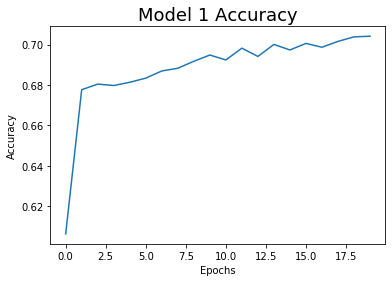

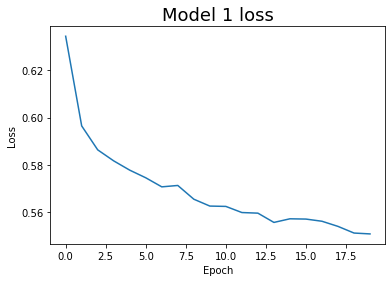

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.77      0.57      0.66      2551
           1       0.65      0.82      0.73      2449

    accuracy                           0.69      5000
   macro avg       0.71      0.70      0.69      5000
weighted avg       0.71      0.69      0.69      5000


 Confusion Matrix 
 [[1458 1093]
 [ 432 2017]]

 Accuracy: 69.5 %

 F1 Score:  0.691

 Precision:  0.71

 Recall:  0.698


In [35]:

def model1():
    model1 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function
    model1.add(Dense(12, activation='relu', input_dim= X_train_normalized.shape[1]))

    #adding 5 hidden layers with different number of neurons
    model1.add(Dense(32, activation='relu'))

    model1.add(Dense(64,activation='relu'))

    model1.add(Dense(64,activation='relu'))

    model1.add(Dense(32,activation='relu'))

    model1.add(Dense(32,activation='relu'))

    #Output layer with softmax activation 
    model1.add(Dense(2, activation='softmax'))

    #Choice of optimizer : Adam
    adam = Adam(lr=0.001, epsilon=None, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    #fitting the model
    history = model1.fit(X_train_normalized, training_labels, epochs=20, batch_size=512, verbose=1)
    #Model Evaluation
    score = model1.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['accuracy'])
    plt.title("Model 1 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 1 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predict the values for test set
    y_pred = model1.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np, y_pred))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred, average="macro"),3))
    
    return y_pred

y_pred = model1()

## Model 2:

### Explanation: 

Behind the neural networks, after getting a simple intuition about how it operates and discovering numerous combinations of hidden modules, activation functions, optimizers. I wanted to create a "Deep Feed Forward" focused network. By maximizing the number of hidden units in a fully connected neural network and by increasing the number of hidden layers. From the previous approach, we will observe that our model precision is not influenced by the growing number of epochs and to retain the same number of secret units in each layer. So we're going to keep that low and all activation functions in our previous system have about the same effect, so I'm keeping 'ReLu' as our activation function. As our optimiser, RMSProp.

### Experimental implementation:

Here, I tried different structure of neural network having more number of neurons with more hidden layers deeply connected with each other. But keeping all the parameters same as of our preious method results.

Epoch 1/7
40/40 [==============================] - 0s 8ms/step - loss: 10.2993 - accuracy: 0.6093
Epoch 2/7
40/40 [==============================] - 0s 7ms/step - loss: 0.6074 - accuracy: 0.6740
Epoch 3/7
40/40 [==============================] - 0s 7ms/step - loss: 0.6210 - accuracy: 0.6618
Epoch 4/7
40/40 [==============================] - 0s 7ms/step - loss: 0.6331 - accuracy: 0.6543
Epoch 5/7
40/40 [==============================] - 0s 7ms/step - loss: 0.6052 - accuracy: 0.6718
Epoch 6/7
40/40 [==============================] - 0s 8ms/step - loss: 0.6087 - accuracy: 0.6716
Epoch 7/7
10/10 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6762


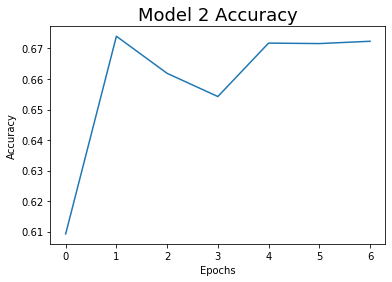

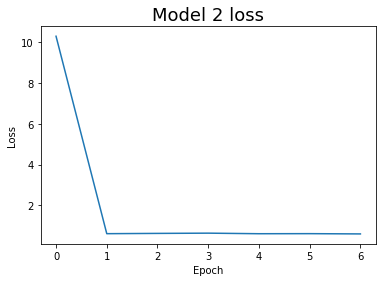


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.79      0.49      0.61      2551
           1       0.62      0.87      0.72      2449

    accuracy                           0.68      5000
   macro avg       0.71      0.68      0.67      5000
weighted avg       0.71      0.68      0.67      5000


 Confusion Matrix 
 [[1260 1291]
 [ 328 2121]]

 Accuracy: 67.62 %

 F1 Score:  0.666

 Precision:  0.708

 Recall:  0.68


In [36]:
def model2():
    model2 = Sequential()


    #input layer with no. of features as input_dim and 'relu' as activation function 
    model2.add(Dense(128, activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 10 hidden layers with 128 neurons 
    model2.add(Dense(128, activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    #Output layer with softmax activation 
    model2.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    model2.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model2.fit(X_train_normalized, training_labels, epochs=7, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model2.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['accuracy'])
    plt.title("Model 2 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 2 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_2 = model2.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np,y_pred_2))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_2))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_2)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_2, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_2, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_2, average="macro"),3))

    return y_pred_2

y_pred_2 = model2()


## Model 3:

### Explanation: 

In our previous process, after checking our model on a higher number of hidden units and hidden layers, we found that even a very large number of layers had a poor effect on our model.I'm attempting to recreate the Extreme Learning Machine  (ELM) network structure for this model. By increasing the number of hidden layers to a certain amount for our network and by keeping fewer and more hidden units for each of our hidden layers for the number of units for the input layer. Likewise, retaining fewer of the epochs and RMSProp that worked equal to others. In addition, we can add dropouts in some layer in this technique and retain relu activation function.

### Experimental implementation:

From various experiments on Method 2, we find that the efficiency of our model decreases if the number of layers or units increases after a certain limit. So we explored another technique in this system, which is less than the hidden layers in the input layer of neurons.

Epoch 1/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.6576
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6768
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6773
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6788
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6742
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.6792
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6791
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.6802
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.6830
Epoch 10/10
10/10 [==============================] - 0s 966us/step - loss: 0.5865 - accuracy: 0.6822


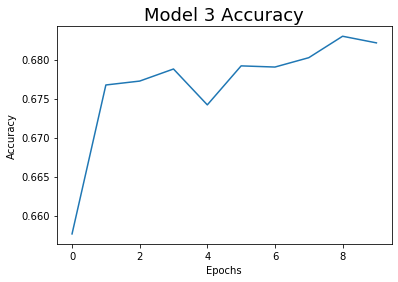

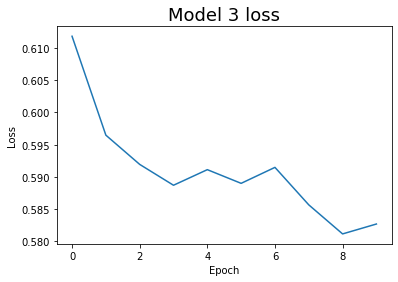


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.85      0.45      0.59      2551
           1       0.62      0.92      0.74      2449

    accuracy                           0.68      5000
   macro avg       0.74      0.69      0.67      5000
weighted avg       0.74      0.68      0.66      5000


 Confusion Matrix 
 [[1159 1392]
 [ 197 2252]]

 Accuracy: 68.22 %

 F1 Score:  0.666

 Precision:  0.736

 Recall:  0.687


In [37]:
def model3():
    model3 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function 
    model3.add(Dense(30, activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 7 hidden layers
    model3.add(Dense(30, activation='relu'))
    model3.add(Dropout(0.1))


    model3.add(Dense(30,activation='relu'))

    model3.add(Dense(30,activation='relu'))
    model3.add(Dropout(0.5))

    model3.add(Dense(30,activation='relu'))


    model3.add(Dense(30,activation='relu'))
    model3.add(Dropout(0.3))


    model3.add(Dense(30,activation='relu'))

    model3.add(Dense(30,activation='relu'))



    #Output layer with softmax activation 
    model3.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    adam = Adam(lr=0.01,epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

    #fitting the model
    history = model3.fit(X_train_normalized, training_labels, epochs=10, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model3.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['accuracy'])
    plt.title("Model 3 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 3 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_3 = model3.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np,y_pred_3))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_3))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_3)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_3, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_3, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_3, average="macro"),3))

    return y_pred_3

y_pred_3 = model3()


# Results

## Plots for the results

### Evaluation Metrics

After all the preprocessing and applying various algorithms on our dataset, ultimately we need to check or visualize its performance. And there different means for performance evaluation in each category of Machine Learrning models. For Classification models are to check for Precision, Recall, Area Under the Curve, Accuracy are various performace metrics. 

1. **Confusion Matrix**: This can be used for both binary as well as Multiple classification problems. Four terms are associated with it:

    i) True Positives(TP):    This is the case when actual class of data points are True and predicted class is also True.
    
    ii) True Negatives(TN):   This is the case when actual class of data points are False predicted class is also False.
    
    iii) False Positives(FP): It is the case where the actual class of data points are False and predicted is True.
    
    iv) False Negatives(FN):  It is the case where the actual class of data points are True and predicted is False.
    
2. **Accuracy**: It is simply number of correct predictions out of all the predictions made by a model.

$$
Accuracy = \frac {TP + TN} {TP + FP + FN + TN} 
$$

Genearlly, it should not be used when majority of target variable in our dataset are of single class.

3. **Precision**: It just tells us that how accurate our predictions are. 
$$
Precision = \frac {TP} {TP + FP} 
$$

4. **Recall**: Recall tells us about the actual positives.
$$
Recall = \frac {TP} {TP + FN} 
$$

5. **F1 Score**: Each time we do not need to take care of both Precision and Recall, as both show opposite behaviour to each other. If Recall increase, then precision decreases and vice-versa. So F1 is the single score that represents both Precision and Recall. We calculate by taking Harmonic Mean of both.


$$
F1  Score: \frac {TP}{TP + \frac {FN + FP}{2}}
$$

### ROC Curve

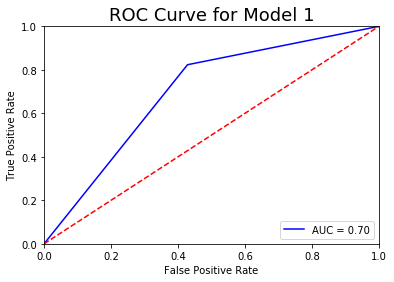

In [38]:
fpr, tpr, threshold = roc_curve(T_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 1', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

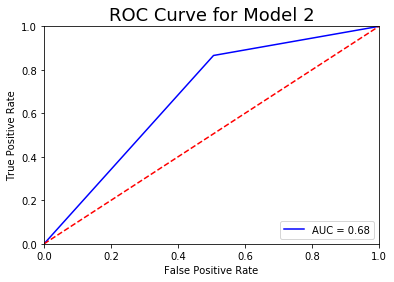

In [39]:
fpr, tpr, threshold = roc_curve(T_test_np, y_pred_2)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 2', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

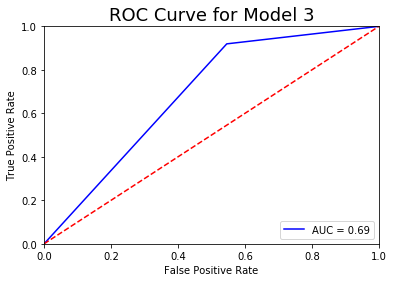

In [40]:
fpr, tpr, threshold = roc_curve(T_test_np, y_pred_3)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 3', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Plotting the curve between actual and predicted values randomly for 300 values, otherwise visulaization would not be clear

Text(0.5, 1.0, 'Model 1 : Predicted Vs Output')

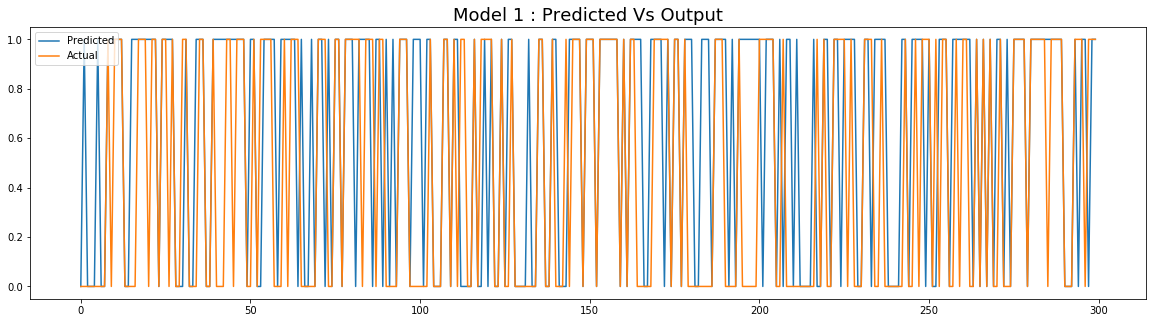

In [41]:
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:500], label = 'Predicted')
plt.plot(T_test_np[200:500], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 1 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 2 : Predicted Vs Output')

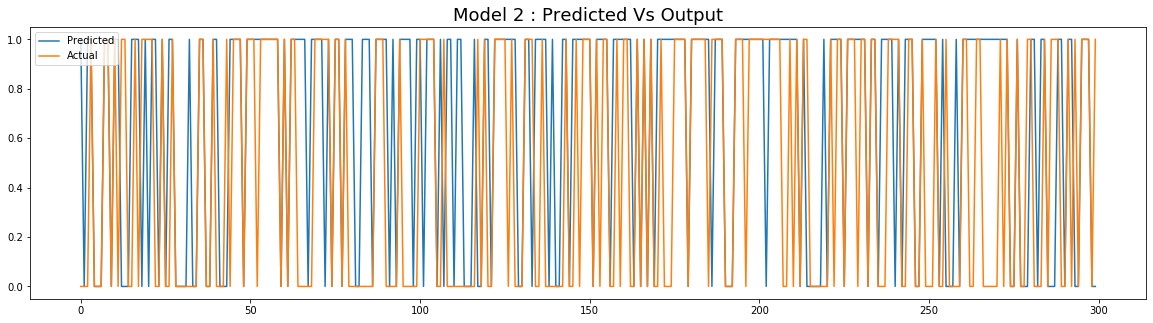

In [42]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_2[300:600], label = 'Predicted')
plt.plot(T_test_np[300:600], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 2 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 3 : Predicted Vs Output')

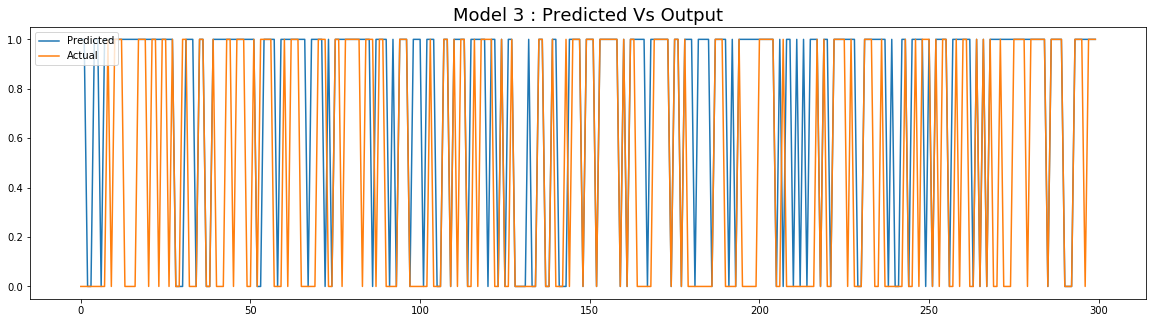

In [43]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_3[200:500], label = 'Predicted')
plt.plot(T_test_np[200:500], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 3 : Predicted Vs Output", fontsize = 18)

## Discussion about choice of network

We have implemented 3 distinct Neural Network architectures above with different combinations of hidden units and hidden layers. They each demonstrate various outcomes. The accuracy of the classification data is not only the indicator, but other measurement criteria are also available, such as precision, recall, F1 score, etc. It depends on our requirements, so we plan our framework accordingly.


In our case, however the first approach we chose, which is strictly random with no particular structure, performs better in all evaluation terms than all others. It has the best precision of nearly 69%, 19% better than the other 2 structures. Another relevant measurement parameter is the F1 value, which is also greater than .689 for model 1. 

The comparison table for appraisal metrics for both models is given below:


<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th></th>
    <th>Accuracy</th>
    <th>F1 score</th> 
    <th>Precision</th>
    <th>Recall</th>
  </tr>
  <tr>
    <th>Method 1</th>
    <td>70%</td> 
    <td>0.703</td>
    <td>0.714</td>
    <td>0.707</td>
  </tr>
    <tr>
    <th>Method 2</th>
    <td>51%</td> 
    <td>0.338</td>
    <td>0.256</td>
    <td>0.5</td>
  </tr>
      <tr>
    <th>Method 3</th>
    <td>70%</td> 
    <td>0.693</td>
    <td>0.724</td>
    <td>0.702</td>
  </tr>
 
</table>

# Conclusion
This workbook was very fascinating and daunting because I was introduced for the very first time to the deep learning principles and libraries here. I tried to learn TensorFlow and Keras from 2 separate libraries for deep learning. In terms of abstraction, they are actually distinct. On tensorflow, Keras is centered and is far more absract than tensorflow. So, particularly when we need to get started on some of these libraries, it is very simple to work on keras. 

I reviewed all of these libraries, applied classification dataset neural networks, faced a lot of new problems and concerns, but most notably learned a lot of new things. I got to know how deep the neural network functions, and I tried 3 different structures for that.

Thus for 5 layers, the first structure was completely random and sought various parameters. But I get some idea of the factors influencing model accuracy for the second, so I tried various networks with more hidden layers and hidden units. And I discovered a new thing for the third one, that often even large numbers of layers weaken our model.


# Further Analysis

In [44]:
#Record Training times
training_time = []

Epoch 1/20
40/40 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6401
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.6773
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.6808
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.6811
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.6822
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.6821
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.6826
Epoch 8/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.6823
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.6862
Epoch 10/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.6841
Epoch 11/20
40/40 [

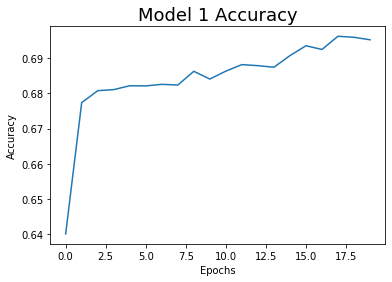

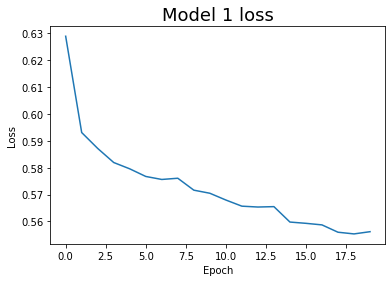


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.75      0.59      0.66      2551
           1       0.65      0.79      0.71      2449

    accuracy                           0.69      5000
   macro avg       0.70      0.69      0.69      5000
weighted avg       0.70      0.69      0.69      5000


 Confusion Matrix 
 [[1510 1041]
 [ 514 1935]]

 Accuracy: 68.9 %

 F1 Score:  0.687

 Precision:  0.698

 Recall:  0.691
Time taken by Model 1 :  2.6545631885528564 seconds


In [45]:
import time
start1 = time.time()
model1()
end1 = time.time()
print("Time taken by Model 1 : ",(end1 - start1),"seconds")
training_time.append((end1 - start1))

Epoch 1/7
40/40 [==============================] - 0s 8ms/step - loss: 10.9826 - accuracy: 0.6032
Epoch 2/7
40/40 [==============================] - 0s 8ms/step - loss: 0.6075 - accuracy: 0.6714
Epoch 3/7
40/40 [==============================] - 0s 8ms/step - loss: 0.6099 - accuracy: 0.6732
Epoch 4/7
40/40 [==============================] - 0s 7ms/step - loss: 0.6192 - accuracy: 0.6664
Epoch 5/7
40/40 [==============================] - 0s 7ms/step - loss: 0.6239 - accuracy: 0.6579
Epoch 6/7
40/40 [==============================] - 0s 7ms/step - loss: 0.6036 - accuracy: 0.6651
Epoch 7/7
10/10 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.5996


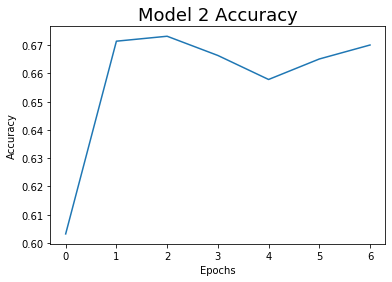

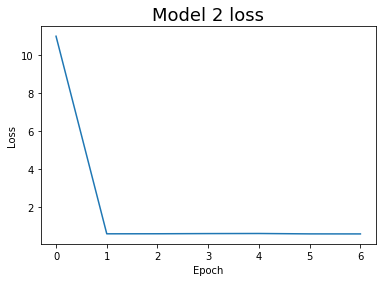


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.59      0.73      0.65      2551
           1       0.62      0.47      0.53      2449

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.59      5000
weighted avg       0.60      0.60      0.59      5000


 Confusion Matrix 
 [[1850  701]
 [1301 1148]]

 Accuracy: 59.96 %

 F1 Score:  0.592

 Precision:  0.604

 Recall:  0.597
Time taken by Model 2 :  3.906219244003296 seconds


In [46]:
import time
start2 = time.time()
model2()
end2 = time.time()
print("Time taken by Model 2 : ",(end2 - start2),"seconds")
training_time.append((end2 - start2))

Epoch 1/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6564
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6786
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.6794
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6791
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.6794
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6815
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.6803
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.6841
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.6822
Epoch 10/10
10/10 [==============================] - 0s 915us/step - loss: 0.5877 - accuracy: 0.6792


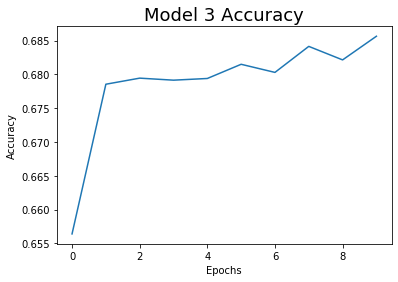

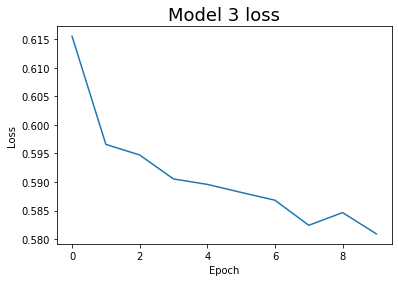


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.81      0.48      0.61      2551
           1       0.62      0.88      0.73      2449

    accuracy                           0.68      5000
   macro avg       0.72      0.68      0.67      5000
weighted avg       0.72      0.68      0.67      5000


 Confusion Matrix 
 [[1230 1321]
 [ 283 2166]]

 Accuracy: 67.92 %

 F1 Score:  0.668

 Precision:  0.717

 Recall:  0.683
Time taken by Model 3 :  2.0956039428710938 seconds


In [47]:
import time
start3 = time.time()
model3()
end3 = time.time()
print("Time taken by Model 3 : ",(end3 - start3),"seconds")
training_time.append((end3 - start3))

In [48]:
from pandas import DataFrame
df = DataFrame(X_train)
df.to_csv("X_train.csv", index = None, header=True)

df = DataFrame(X_test)
df.to_csv("X_test.csv", index = None, header=True)

df = DataFrame(T_train)
df.to_csv("T_train.csv", index = None, header=True)

df = DataFrame(T_test)
df.to_csv("T_test.csv", index = None, header=True)

### I ran all my methods on google colab GPU and below is my google colab link:

https://colab.research.google.com/drive/1HnjVEUWfuZJpdgT3I-NRm9k6yoNHHPHL?usp=sharing

#### GPU times
[5.495565176010132, 3.1438868045806885, 2.8550381660461426]

<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th></th>
    <th>GPU</th>
    <th>CPU</th> 
  </tr>
  <tr>
    <th>Method 1</th>
    <td>5.495565176010132</td> 
    <td>3.0145301818847656</td>
  </tr>
    <tr>
    <th>Method 2</th>
    <td>3.1438868045806885</td> 
    <td>4.46113395690918</td>
  </tr>
      <tr>
    <th>Method 3</th>
    <td>2.8550381660461426</td> 
    <td>2.3317620754241943</td>
  </tr>
 
</table>

### Results:
Though the results from GPU are not better as compared to our normal CPU. This could be because of small size of our data.
GPU could results better on may be very large dataset.



There are a lot of different neural networks as you see in the figure below.

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />

